# Questão 1

## A nota geral do ENADE dos cursos é influenciada pelo custo aluno? Isto é, quanto mais caro o aluno, mais investimento é feito e maior é a nota?

In [14]:
# Biblioteca científica
import numpy as np
# Biblioteca para análise de dados
import pandas as pd
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [15]:
# Carregando os dados
ies_custo = pd.read_csv('./custo_ies_federais_brasil.csv')

In [16]:
ies_custo['custoAluno'] = pd.to_numeric(ies_custo['custoAluno'])
ies_custo = ies_custo.rename(columns={'Instituicao': 'instituicao', 'Sigla': 'sigla', 'despesaLiquidada': 'despesa_liquidada', 'totalAlunos': 'total_alunos', 'custoAluno': 'custo_aluno'})
ies_custo

,instituicao,sigla,despesa_liquidada,total_alunos,custo_aluno
0,UNIVERSIDADE FEDERAL DO ACRE (UFAC),UFAC,286.2,9732,29412.1
1,UNIVERSIDADE FEDERAL DE ALAGOAS (UFAL),UFAL,802.8,23741,33813.6
2,UNIVERSIDADE FEDERAL DO AMAZONAS (UFAM),UFAM,663.5,32203,20603.9
3,UNIVERSIDADE FEDERAL DO AMAPÁ (UNIFAP),UNIFAP,152.7,10796,14148.7
4,UNIVERSIDADE FEDERAL DA BAHIA (UFBA),UFBA,1480.0,41445,35709.2
...,...,...,...,...,...
58,UNIVERSIDADE FEDERAL DE SERGIPE (UFS),UFS,635.4,30060,21138.2
59,FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC (UFABC),UFABC,229.4,13203,17377.8
60,UNIVERSIDADE FEDERAL DE SÃO CARLOS (UFSCAR),UFSCAR,537.4,16404,32762.6
61,UNIVERSIDADE FEDERAL DE SÃO PAULO (UNIFESP),UNIFESP,1199.9,14784,81161.8


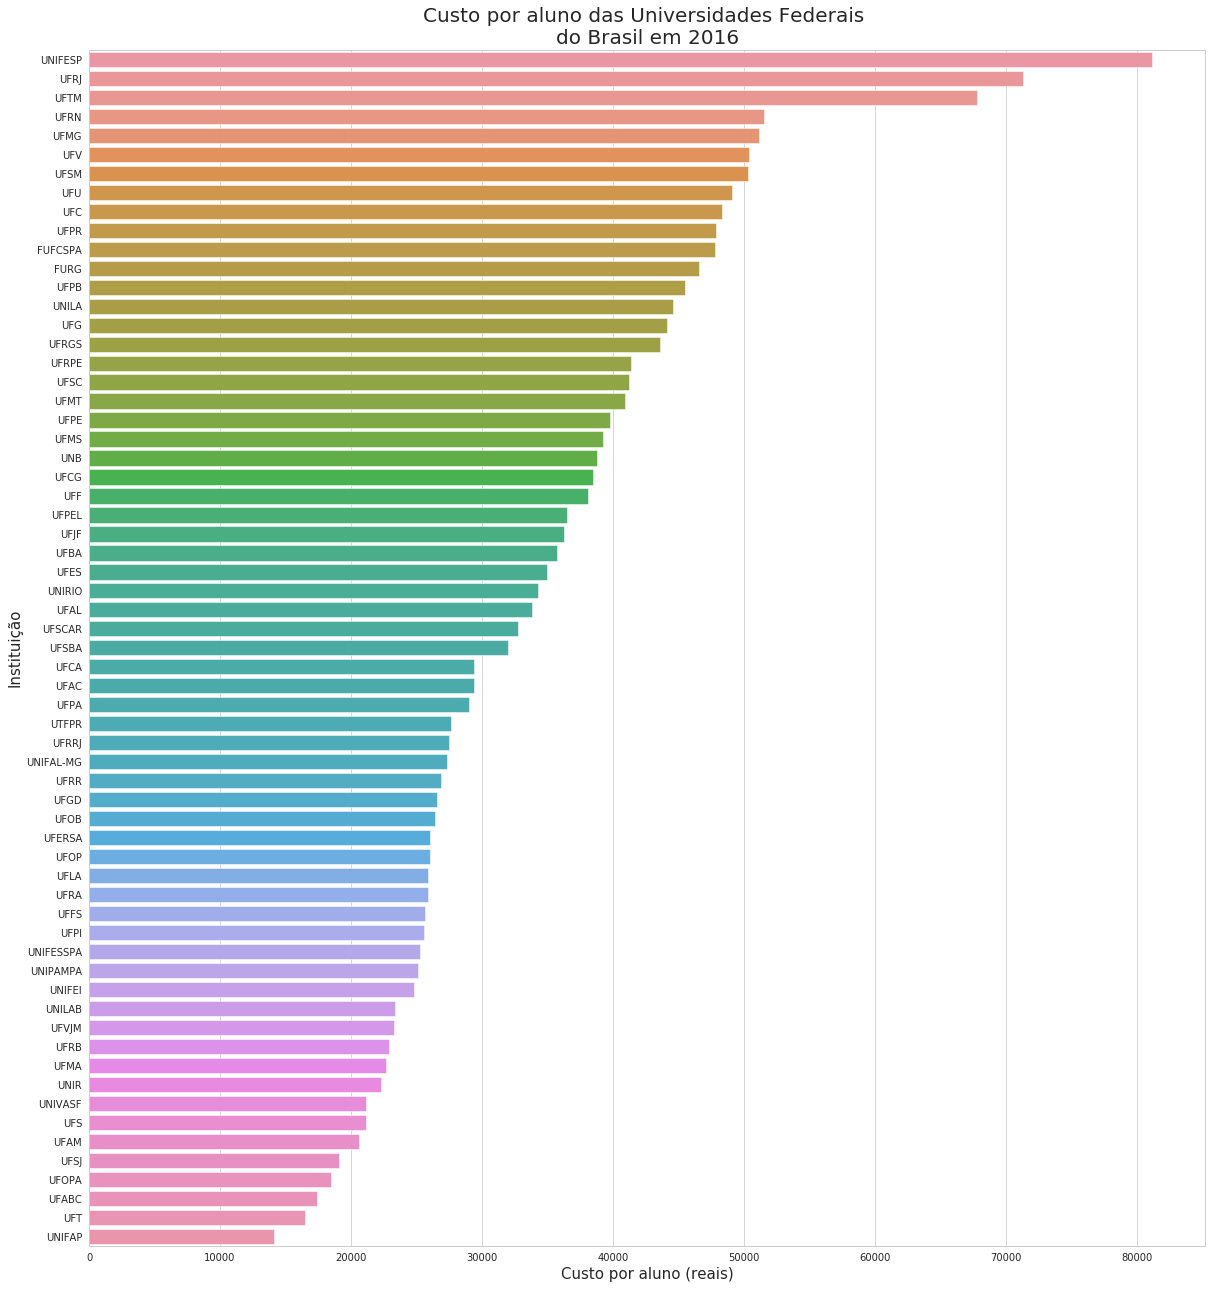

In [17]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(20,22))

# Gerando a figura
ax = sns.barplot(y='sigla', x='custo_aluno', data=ies_custo.sort_values(by='custo_aluno', ascending=False))

# Título da Figura
ax.set_title('Custo por aluno das Universidades Federais \ndo Brasil em 2016', fontsize=20)

# Definindo o nome do eixo horizontal
ax.set_ylabel('Instituição', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_xlabel('Custo por aluno (reais)', fontsize=15)

# Exibindo a figura sem mensagem de retorno
plt.show()

Podemos observar que a **UNIFESP** possui o maior custo por aluno, em disparado, e a **UNIFAP**, em contrapartida, possui o menor.

In [18]:
resultados_enade_tudo = pd.read_csv('ENADE2017/dados/resultados_conceito_enade_2017.csv')

### Custo por aluno X Conceito médio do Enade por Instituição

In [19]:
siglas_ies = list(ies_custo['sigla'])
resultados_enade_ies_tudo = resultados_enade_tudo[resultados_enade_tudo['Sigla da IES'].isin(siglas_ies)]
resultados_enade_ies_tudo = resultados_enade_ies_tudo[resultados_enade_ies_tudo['Conceito Enade (Faixa)'] != 'SC']
resultados_enade_ies_tudo = resultados_enade_ies_tudo.filter(['Sigla da IES', 'Conceito Enade (Contínuo)', 'Conceito Enade (Faixa)'])
resultados_enade_ies_tudo = resultados_enade_ies_tudo.rename(columns={"Sigla da IES": "sigla", "Conceito Enade (Contínuo)": "enade", "Conceito Enade (Faixa)": "enade_faixa"}, errors="raise")
resultados_enade_ies = resultados_enade_ies_tudo.filter(['sigla', 'enade'])

resultados_enade_ies['enade'].replace(regex=True, inplace=True, to_replace=r'\,\\?', value=r'.')
resultados_enade_ies['enade'] = pd.to_numeric(resultados_enade_ies['enade'])

resultados_media_dec = resultados_enade_ies.groupby('sigla').mean()
resultados_media = resultados_media_dec.reset_index()
resultados_media['enade'] = resultados_media['enade'].apply(np.ceil)
resultados_media['enade'] = resultados_media['enade'].astype(int)
resultados_enade = resultados_media
resultados_enade

,sigla,enade
0,FURG,3
1,UFABC,4
2,UFAC,3
3,UFAL,3
4,UFAM,3
...,...,...
56,UNIPAMPA,3
57,UNIR,2
58,UNIRIO,4
59,UNIVASF,4


In [20]:
enade_custo = pd.merge(ies_custo, resultados_enade, how='inner', left_on='sigla', right_on='sigla')
enade_custo

,instituicao,sigla,despesa_liquidada,total_alunos,custo_aluno,enade
0,UNIVERSIDADE FEDERAL DO ACRE (UFAC),UFAC,286.2,9732,29412.1,3
1,UNIVERSIDADE FEDERAL DE ALAGOAS (UFAL),UFAL,802.8,23741,33813.6,3
2,UNIVERSIDADE FEDERAL DO AMAZONAS (UFAM),UFAM,663.5,32203,20603.9,3
3,UNIVERSIDADE FEDERAL DO AMAPÁ (UNIFAP),UNIFAP,152.7,10796,14148.7,2
4,UNIVERSIDADE FEDERAL DA BAHIA (UFBA),UFBA,1480.0,41445,35709.2,4
...,...,...,...,...,...,...
56,UNIVERSIDADE FEDERAL DE SERGIPE (UFS),UFS,635.4,30060,21138.2,3
57,FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC (UFABC),UFABC,229.4,13203,17377.8,4
58,UNIVERSIDADE FEDERAL DE SÃO CARLOS (UFSCAR),UFSCAR,537.4,16404,32762.6,4
59,UNIVERSIDADE FEDERAL DE SÃO PAULO (UNIFESP),UNIFESP,1199.9,14784,81161.8,4


In [21]:
enade_custo_filtrado = enade_custo.filter(['custo_aluno', 'enade'])
enade_custo_filtrado

,custo_aluno,enade
0,29412.1,3
1,33813.6,3
2,20603.9,3
3,14148.7,2
4,35709.2,4
...,...,...
56,21138.2,3
57,17377.8,4
58,32762.6,4
59,81161.8,4


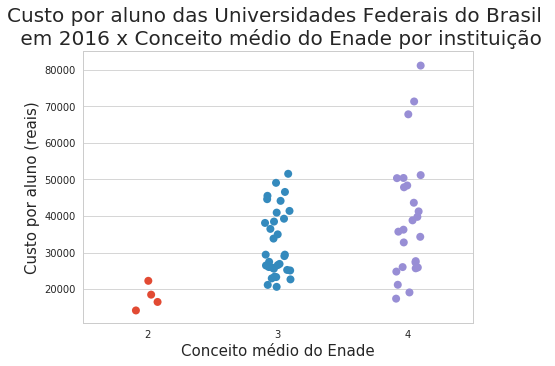

In [22]:
fig, gph = plt.subplots(figsize=(7,5))

gph = sns.stripplot(x='enade', y='custo_aluno', data=enade_custo_filtrado.sort_values(by='enade', ascending=True), s=8, lw=1)

gph.set_title('Custo por aluno das Universidades Federais do Brasil \n em 2016 x Conceito médio do Enade por instituição', fontsize=20)

gph.set_xlabel('Conceito médio do Enade', fontsize=15)

gph.set_ylabel('Custo por aluno (reais)', fontsize=15)

plt.show()

### Custo por aluno X Nota do Enade por curso

In [23]:
resultados_enade_ies_tudo
resultados_enade_cursos_faixa = resultados_enade_ies_tudo.reset_index().filter(['sigla', 'enade_faixa'])
resultados_enade_cursos_faixa

,sigla,enade_faixa
0,UFMT,5
1,UNB,5
2,UNB,4
3,UFS,4
4,UFAM,4
...,...,...
2229,UFCG,4
2230,UFCG,3
2231,UFT,2
2232,UFT,2


In [24]:
ies_custo_aluno = ies_custo.filter(['sigla', 'custo_aluno'])
ies_custo_aluno

,sigla,custo_aluno
0,UFAC,29412.1
1,UFAL,33813.6
2,UFAM,20603.9
3,UNIFAP,14148.7
4,UFBA,35709.2
...,...,...
58,UFS,21138.2
59,UFABC,17377.8
60,UFSCAR,32762.6
61,UNIFESP,81161.8


In [25]:
enade_custo_curso = pd.merge(ies_custo_aluno, resultados_enade_cursos_faixa, how='inner', left_on='sigla', right_on='sigla')
enade_custo_curso = enade_custo_curso.filter(['custo_aluno', 'enade_faixa'])
enade_custo_curso

,custo_aluno,enade_faixa
0,29412.1,3
1,29412.1,4
2,29412.1,3
3,29412.1,3
4,29412.1,3
...,...,...
2229,16476.7,2
2230,16476.7,4
2231,16476.7,3
2232,16476.7,2


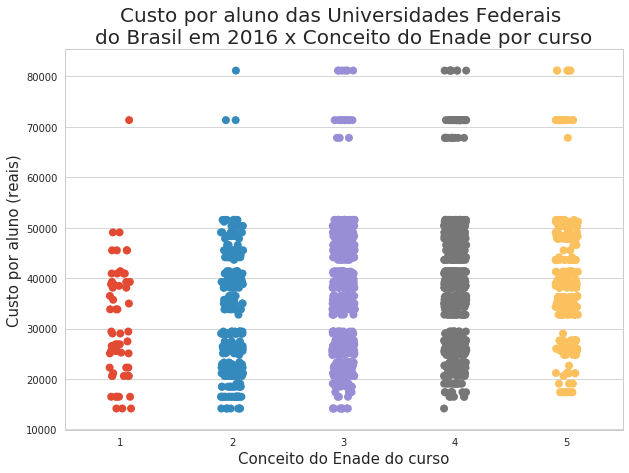

In [26]:
fig, gph = plt.subplots(figsize=(10,7))

gph = sns.stripplot(x='enade_faixa', y='custo_aluno', data=enade_custo_curso.sort_values(by='enade_faixa', ascending=True), s=8, lw=1)

gph.set_title('Custo por aluno das Universidades Federais \ndo Brasil em 2016 x Conceito do Enade por curso', fontsize=20)

gph.set_xlabel('Conceito do Enade do curso', fontsize=15)

gph.set_ylabel('Custo por aluno (reais)', fontsize=15)

plt.show()

### Comparando menor custo por aluno com o maior custo por aluno

Partindo das análises anteriores, vamos comparar os conceitos do enade obtidos pelas universidades que possuem o maior e o menor custo por aluno, sendo elas a **UNIFESP** e **UNIFAP**.

In [27]:
# resultados_enade_ies_tudo
siglas_maior_menor = ['UNIFESP', 'UNIFAP']
resultados_enade_ies_maior_menor = resultados_enade_ies_tudo[resultados_enade_ies_tudo['sigla'].isin(siglas_maior_menor)].reset_index()
resultados_enade_ies_maior_menor = resultados_enade_ies_maior_menor.filter(['sigla', 'enade_faixa'])
resultados_enade_ies_maior_menor.head()

,sigla,enade_faixa
0,UNIFAP,3
1,UNIFESP,3
2,UNIFAP,2
3,UNIFESP,3
4,UNIFESP,5


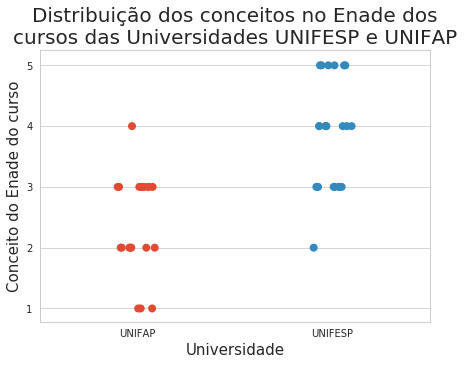

In [28]:
fig, gph = plt.subplots(figsize=(7,5))

gph = sns.stripplot(x='sigla', y='enade_faixa', data=resultados_enade_ies_maior_menor.sort_values(by='enade_faixa', ascending=True), s=8, lw=1)

gph.set_title('Distribuição dos conceitos no Enade dos\ncursos das Universidades UNIFESP e UNIFAP', fontsize=20)

gph.set_ylabel('Conceito do Enade do curso', fontsize=15)

gph.set_xlabel('Universidade', fontsize=15)

plt.show()

### Cálculo da correlação

In [29]:
from scipy.stats import pearsonr, spearmanr, kendalltau

Calculando a correlação a partir dos valores de todos os cursos de todas as universidades federais

In [30]:
# Calculando a correlação de spearman
# resultados_enade_ies
correlacao_dados = pd.merge(ies_custo_aluno, resultados_enade_ies, how='inner', left_on='sigla', right_on='sigla')
correlacao_dados
x = correlacao_dados.custo_aluno
y = correlacao_dados.enade
coef, p = pearsonr(x,y)
print('Correlação de pearson para todos os cursos: %.2f' % coef)

Correlação de pearson para todos os cursos: 0.26


Calculando a correlação a partir do valor da média da nota do enade por universidade

In [31]:
media_corr = resultados_media_dec.reset_index()
correlacao_dados_med = pd.merge(ies_custo_aluno, media_corr, how='inner', left_on='sigla', right_on='sigla')
correlacao_dados_med

,sigla,custo_aluno,enade
0,UFAC,29412.1,2.153376
1,UFAL,33813.6,2.275952
2,UFAM,20603.9,2.246221
3,UNIFAP,14148.7,1.835745
4,UFBA,35709.2,3.103327
...,...,...,...
56,UFS,21138.2,2.476909
57,UFABC,17377.8,3.807674
58,UFSCAR,32762.6,3.567613
59,UNIFESP,81161.8,3.310273


In [32]:
x = correlacao_dados_med.custo_aluno
y = correlacao_dados_med.enade
coef, p = pearsonr(x,y)
print('Correlação de person para conceito médio por universidade: %.2f' % coef)

Correlação de person para conceito médio por universidade: 0.45
